<a href="https://colab.research.google.com/github/OVP2023/dataPY/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%BB%D1%8F_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Итоговая работа.

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

In [ ]:
#Задание 1
#Вычислите производную функции y
#в точке x0=1

import sympy as sym
from sympy.abc import x

y=sym.tan(sym.sin(x)+sym.cos(2*x+3))**2
d=sym.diff(y)
print('Формула функции y:', y)
print('Формула производной: ',d)
print('Формула производной в точке x0=1', d.subs(x,1))
print('Производная в точке x0=1 равна ',2*(1 + np.tan(np.cos(5) + np.sin(1))**2)*(np.cos(1) - 2*np.sin(5))*np.tan(np.cos(5) + np.sin(1)))

Формула функции y: tan(sin(x) + cos(2*x + 3))**2
Формула производной:  2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
Формула производной в точке x0=1 2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))
Производная в точке x0=1 равна  55.385917635337854


Задание2  Дан объект в 2D пространстве. При помощи матричных операций выполните:

Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)

Была ошибка Задание 2 - операции преобразования выполняются вместе, последовательно друг за другом к исходному объекту. Для смещения на (200, 300) можно просто A + [200, 300, 0] или матрица [[1, 0, 200],[0, 1, 300], [0, 0, 0]], а для масштабирования на (0.5, 1.2) поможет [[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]]. Когда мы применяем трансформацию к самому объекту задавая [[1, 0, 200], [0, 1, 300], [0, 0, 1]] нам следует делать это с транспонированием, в другом случае, когда применяем ко всем значениям оси [[1, 0, 0], [0, 1, 0], [200, 300, 1]] тогда без.


(-200.0, 200.0)

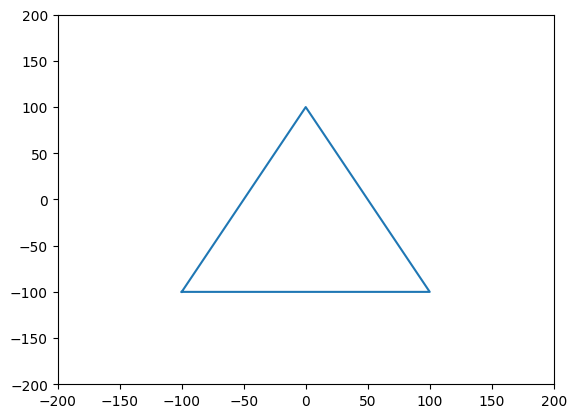

In [ ]:
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [ ]:
#Для масштабирования (0.5,1.2) применяем диагональную матрицу
B1=np.array([[0.5,0,0],[0,1.2,0],[0,0,1]])
#Для смещения (200,300)
B =[
[200, 300, 0]
]

res1=B1@A.transpose()
#результат масштабирования смещаем на (200,300)
tt1=res1.transpose() + B

(-500.0, 500.0)

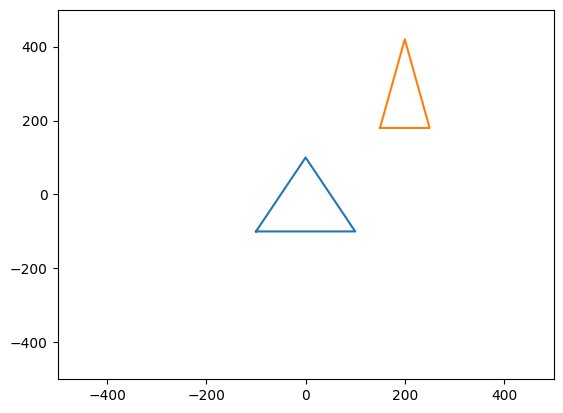

In [ ]:
x1 = tt1[:,0]
y1 = tt1[:,1]
plt.plot(x, y)
plt.plot(x1, y1)
plt.ylim([-500, 500])
plt.xlim([-500, 500])

Была ошибка Задание 2 - операции преобразования выполняются вместе, последовательно друг за другом к исходному объекту.
Для смещения на (200, 300) можно просто A + [200, 300, 0] или матрица [[1, 0, 200],[0, 1, 300], [0, 0, 0]], а для масштабирования на (0.5, 1.2) поможет [[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]]. Когда мы применяем трансформацию к самому объекту задавая [[1, 0, 200], [0, 1, 300], [0, 0, 1]] нам следует делать это с транспонированием, в другом случае, когда применяем ко всем значениям оси [[1, 0, 0], [0, 1, 0], [200, 300, 1]] тогда без.

Задание 3
Найдите собственные значения и собственные вектора матрицы:

In [ ]:
#Получаем собственные значения и матрицу собственных векторов матрицы m
m = np.array([[1, 4],
              [1, 1]])
a, U = np.linalg.eig(m)
print('Собственные значения',a)
print('Матрица собственных векторов',U)

Собственные значения [ 3. -1.]
Матрица собственных векторов [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


Задание 3 - Верно

Задание 4
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

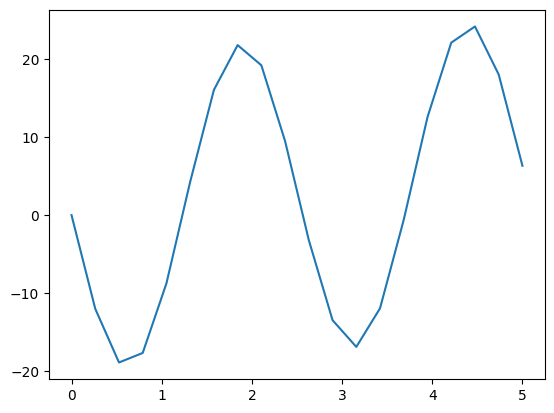

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
from scipy.optimize import minimize

x0=np.array([0.5,-17])
#nelder-mead оптимизирует не совсем точно
#res = minimize(error, x0, method='nelder-mead',
#    options={'disp': True})

#вариант более точной оптимизации по методу оптимизации COBYLA (Constrained Optimization BY Linear Approximations), который является методом безусловной оптимизации, т.е. не требует определения ограничений для параметров
#res = minimize(error, [0,0], method='COBYLA')

#Дифференциальная эволюция  [(-5, 5), (-25, 25)] bounds представляет собой список кортежей, задающих диапазон значений каждого из параметров функции error
res = differential_evolution(error, [(-5, 5), (-25, 25)])

print(res.x)

[ 3.         21.37610417]


<function matplotlib.pyplot.show(close=None, block=None)>

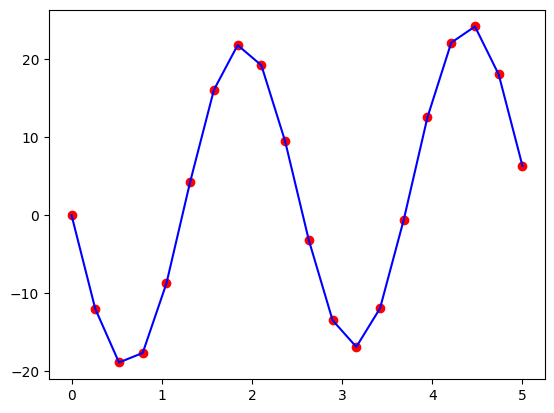

In [ ]:
#Строим график исходных данных
plt.plot(x,fx,'ro',label='Original data')
#Строим график модели с оптимальными параметрами
plt.plot(x,f(x,res.x[0],res.x[1]),'b-',label='Model function')
plt.legend
plt.show

Задание 4 - Верно! Единственное получилось не совсем оптимально:

Можно minimize(error, [0,0], method='COBYLA').x
Данный код решает задачу оптимизации параметров a и b для функции f(x, a, b) таким образом, чтобы минимизировать абсолютную ошибку error между значениями функции f(x, a, b) и исходными значениями fx в точках x.

В данном случае используется функция minimize из библиотеки scipy.optimize, которая минимизирует заданную функцию ошибки error при заданных начальных значениях параметров [0, 0] (в данном случае для a и b). Метод оптимизации, используемый здесь - COBYLA (Constrained Optimization BY Linear Approximations), который является методом безусловной оптимизации, т.е. не требует определения ограничений для параметров.

Или

differential_evolution можно differential_evolution(error, [(-5, 5), (-25, 25)])
Это решение использует глобальную оптимизацию, а именно дифференциальную эволюцию (differential evolution).
Глобальная оптимизация позволяет найти оптимальное решение для задачи оптимизации, не ограничиваясь локальными оптимумами. Дифференциальная эволюция является одним из алгоритмов глобальной оптимизации и использует эволюционный подход.
В данном случае, используется функция differential_evolution из библиотеки scipy.optimize, которая находит глобальный минимум функции error на заданном диапазоне параметров bounds. Параметр bounds представляет собой список кортежей, задающих диапазон значений каждого из параметров функции f.
Результатом этого решения является оптимальный набор параметров для функции f, минимизирующий значение функции ошибки error на заданном диапазоне параметров.

Задание 5
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов)) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

В решение была ошибка в части, где находите индекс наиболее похожего пользователя. В коде, используете индекс из matrix, что приводит к смещению индексов. В результате это может привести к неправильным парам (x, y).

Чтобы исправить код, нужно учесть смещение индексов, возникающее при удалении текущего пользователя из матрицы. Вместо использования текущего индекса из matrix, нужно корректировать индекс, чтобы он соответствовал исходной матрице raitings.

In [ ]:

raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])


In [ ]:
list_cos={}
for indexR, vectorR in enumerate(raitings):
    req_product= raitings[indexR]
    matrix=np.delete(raitings,[indexR],0)
    max_ = 0
    product_index = 0
    vector_product = np.linalg.norm(req_product)
    for index, vector in enumerate(matrix):
        vector_product_row = np.linalg.norm(vector)
        cos_ = np.dot(req_product, vector) / (vector_product * vector_product_row)
        if cos_ > max_:
            max_ = cos_
            product_index = index
    #корректировка индекса похожего фильма в зависимости от индекса исследуемой строки в raitings
    if product_index < indexR:
        list_cos[indexR] = product_index
    else:
        list_cos[indexR] = product_index+1
print(list_cos)

{0: 8, 1: 4, 2: 9, 3: 9, 4: 8, 5: 9, 6: 3, 7: 5, 8: 0, 9: 2}


Задание 5 - Верно!
Прикрепляю пример короткой реализации косинусного сходства:

from sklearn.metrics import pairwise_distances

for i, vector in enumerate(pairwise_distances(raitings, metric="cosine")):
    print(i, list(vector).index(np.min(vector[np.nonzero(vector)])))